In [102]:
import pandas as pd
import numpy as np

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
df = pd.read_csv('workvoltwoaa.csv')

In [105]:
df.head()

,StateFormated,DateFormated,TimeFormated,Bus_InvolvementFormated,Heavy_Rigid_Truck_InvolvementFormated,Speed_LimitFormated,Road_UserFormated,GenderFormated,AgeFormated,Crash_TypeFormated
0,4,42736,2.00,1,1,50,7,1,64,2
1,8,42736,0.69,1,1,100,4,2,21,3
2,8,42736,0.72,1,1,70,2,2,25,3
3,2,42737,0.76,1,1,50,2,2,28,3
4,2,42737,0.55,1,1,80,4,2,26,1


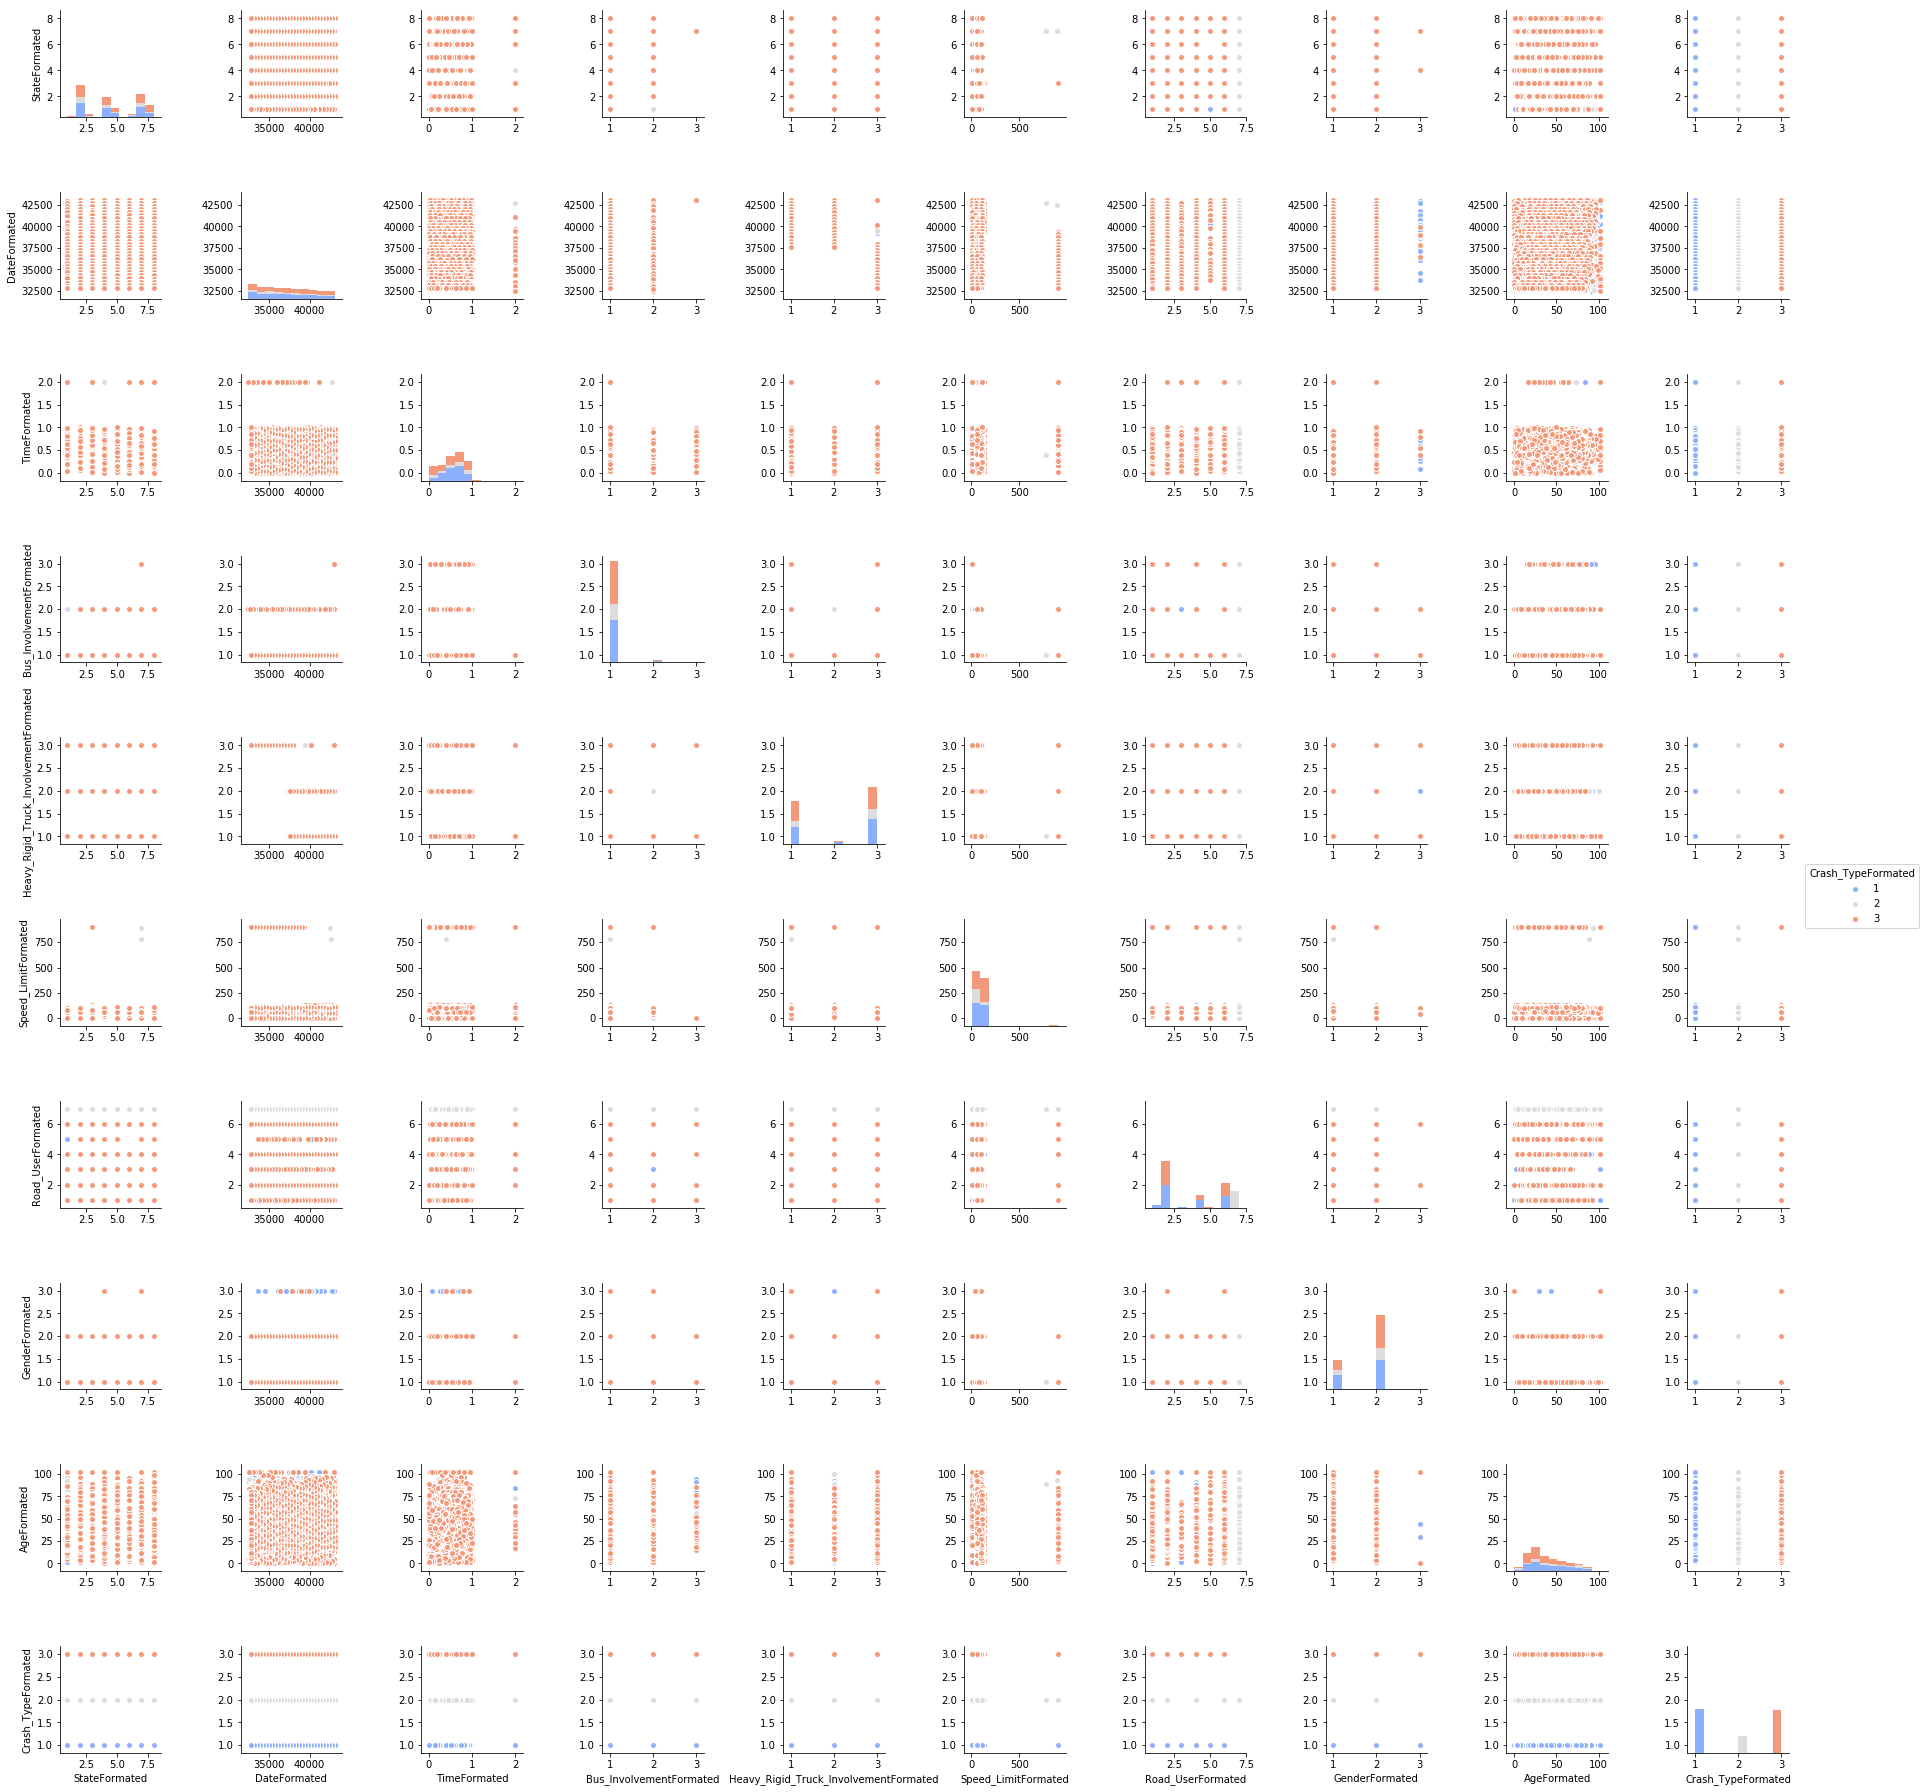

In [106]:
sns.pairplot(df,hue='Crash_TypeFormated', palette='coolwarm')

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(df.drop('Crash_TypeFormated', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
scaled_features = scaler.transform(df.drop('Crash_TypeFormated',axis=1))

In [111]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(3)


,StateFormated,DateFormated,TimeFormated,Bus_InvolvementFormated,Heavy_Rigid_Truck_InvolvementFormated,Speed_LimitFormated,Road_UserFormated,GenderFormated,AgeFormated
0,-0.262780,1.851257,5.340844,-0.139715,-1.161176,-0.446232,1.444447,-1.575442,1.129212
1,1.515808,1.851257,0.530464,-0.139715,-1.161176,0.082947,0.015891,0.631674,-0.844047
2,1.515808,1.851257,0.640625,-0.139715,-1.161176,-0.234561,-0.936480,0.631674,-0.660488


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df_feat
y = df['Crash_TypeFormated']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier(n_neighbors=1)

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [118]:
pred = knn.predict(X_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(confusion_matrix(y_test,pred))

[[3599   46 2420]
 [  38 2306   43]
 [2435   34 3589]]


In [121]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.59      0.59      0.59      6065
          2       0.97      0.97      0.97      2387
          3       0.59      0.59      0.59      6058

avg / total       0.65      0.65      0.65     14510



In [128]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Error Rate')

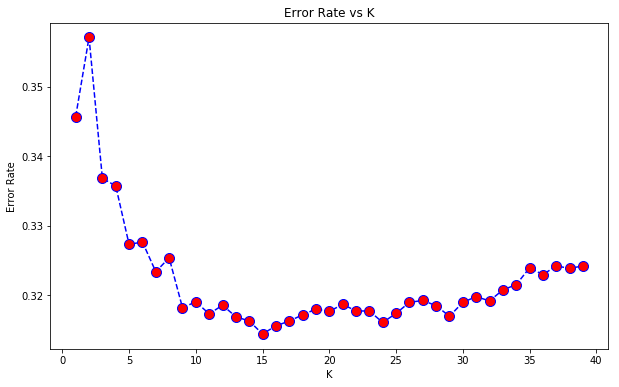

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [124]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


[[3900  114 2051]
 [  72 2249   66]
 [2176   83 3799]]


             precision    recall  f1-score   support

          1       0.63      0.64      0.64      6065
          2       0.92      0.94      0.93      2387
          3       0.64      0.63      0.63      6058

avg / total       0.68      0.69      0.68     14510

